# Model Evaluation with K-Fold & Grid Search

- Breast Cancer Dataset (in-built dataset)

### Step 1: Import necessary libraries

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the Breast Cancer dataset

In [4]:
data=load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [9]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

### Step 3: Split the dataset into training and testing sets

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=45,stratify=y)



### Step 4: Create a Logistic Regression classifier

In [13]:
clf=LogisticRegression(random_state=42)

### Step 5: Perform K-Fold Cross-Validation (K=5) to evaluate the model


In [14]:
cv_score=cross_val_score(clf,X_train,y_train,cv=5, scoring='accuracy')

### Step 6: Fit the model on the entire training set


In [15]:
clf.fit(X_train,y_train)

LogisticRegression(random_state=42)

### Step 7: Make predictions on the test set

In [16]:
y_pred=clf.predict(X_test)

### Step 8: Evaluate the model using classification metrics


In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
df=pd.DataFrame(conf_matrix,index=['Acutal0','Acutal1'],columns=['Predict0','Predict1'])
df

,Predict0,Predict1
Acutal0,40,2
Acutal1,2,70


<Axes: >

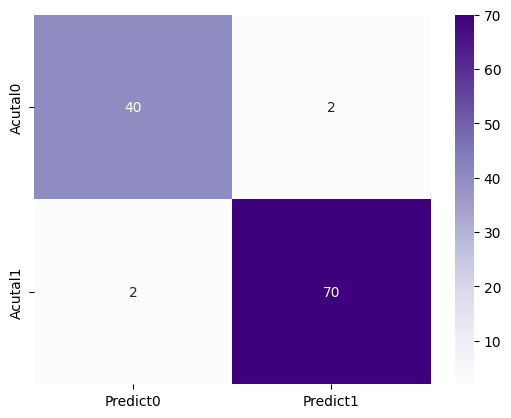

In [19]:
sns.heatmap(df,annot=True,cmap="Purples")

In [21]:
print("K-Fold Cross-Validation Results:")
for i, score in enumerate(cv_score, 1):
    print(f"Fold {i}: {score:.2f}")

K-Fold Cross-Validation Results:
Fold 1: 0.96
Fold 2: 0.97
Fold 3: 0.93
Fold 4: 0.95
Fold 5: 0.93


### Step 10: Print the evaluation metrics and classification report

In [22]:
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Evaluation Metrics:
Accuracy: 0.96
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Confusion Matrix:
[[40  2]
 [ 2 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Step 11: Perform Grid Search for hyperparameter tuning

In [23]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train
                )

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

### Step 12: Get the best hyperparameters

In [24]:
best_params=grid_search.best_params_

In [25]:
best_params

{'C': 1}

### Step 13: Train a Logistic Regression classifier with the best hyperparameters

In [26]:
best_clf=LogisticRegression(random_state=42, **best_params)
best_clf.fit(X_train,y_train)

LogisticRegression(C=1, random_state=42)

### Step 14: Make predictions with the tuned model

In [27]:
y_pred_tuned= best_clf.predict(X_test)

### Step 15: Evaluate the tuned model

In [29]:
accuracy_tuned=accuracy_score(y_test,y_pred_tuned)
print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Tuned Model: {accuracy_tuned:.2f}")


Grid Search Results:
Best Hyperparameters: {'C': 1}
Test Set Accuracy with Tuned Model: 0.96


### Compare result of k-fold & Grid Search

In [30]:
# Perform K-Fold Cross-Validation and store the accuracy scores
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Print and compare the results side by side
print("K-Fold Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Test Set Accuracy: {accuracy:.2f}")

print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Tuned Model: {accuracy_tuned:.2f}")

K-Fold Cross-Validation Results:
Mean Accuracy: 0.95
Test Set Accuracy: 0.96

Grid Search Results:
Best Hyperparameters: {'C': 1}
Test Set Accuracy with Tuned Model: 0.96
